##SAS Demo


Now that we have downloaded the US Census data file, we will manipulate it in SAS!

Let's say we want to look at the distribution of residents by sex in the United States.

In [1]:
libname demo 'c:\temp';

Please enter the name of the SAS Config you wish to run. Available Configs are: ['winlocal', 'winiomIWA'] winlocal
SAS Connection established. Subprocess id is 884



Let's see a line plot of women and men in the western states.


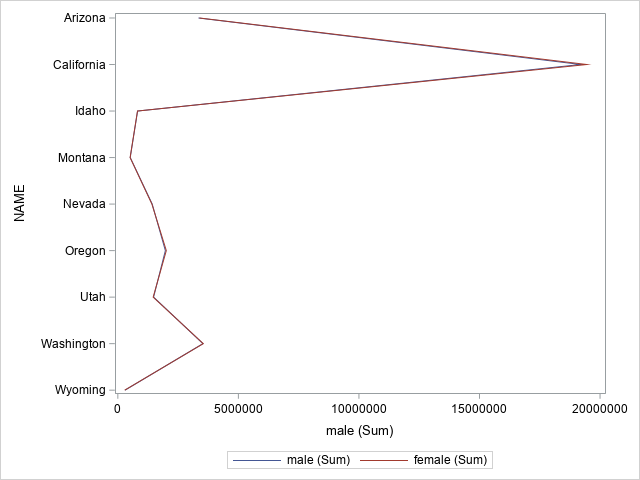

In [2]:
proc sgplot data=demo.uscen_data;
where name in ('California','Oregon','Washington','Arizona','Nevada','Idaho','Utah','Wyoming','Montana');
hline name/response=male;
hline name/response=female;
run;


Hmm, not very interesting, since they're so close.  Maybe we can look at percentage female?


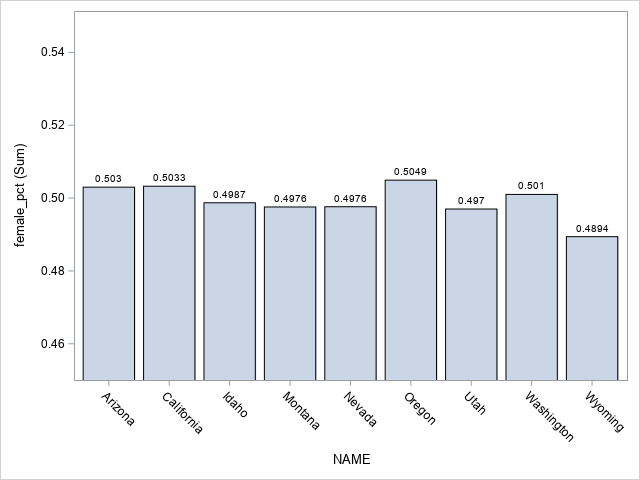

In [3]:
data uscen_data_pct;
  set demo.uscen_data;
  female_pct = female/(male+female);
run;

proc sgplot data=uscen_data_pct;
  yaxis min=0.45 max=0.55;
  vbar name/response=female_pct datalabel;
  where name in ('California','Oregon','Washington','Arizona','Nevada','Idaho','Utah','Wyoming','Montana');
run;

Looks like Oregon has the largest proportion of women, while Idaho, Wyoming, and Nevada are mostly men!

What about Canada?  Let's go check that canadian dataset.


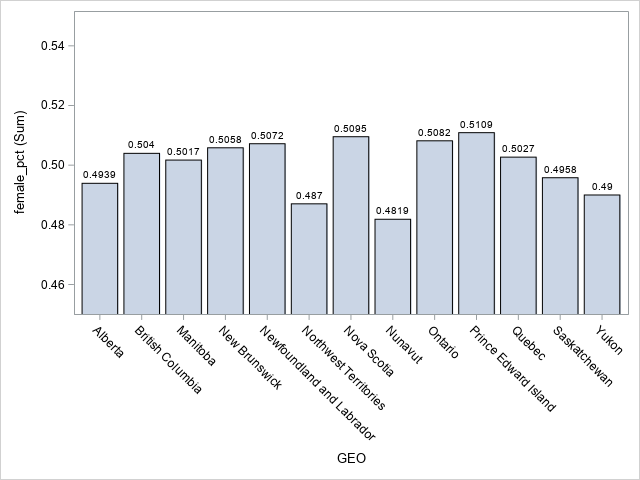

In [12]:
data canada_sex_by_province;
  set demo.statcan_data;
  where 'age group'n = 'All ages' and geo ne 'Canada' 
        and year(datepart(ref_date))=2017 and sex in ('Males','Females');
run;

proc transpose data=canada_sex_by_province out=canada_sex_by_province_t;
  by geo notsorted;
  id sex;
  var value;
run;

data canada_sex_proportion;
  set canada_sex_by_province_t;
  female_pct =females/(females+males);
run;

proc sgplot data=canada_sex_proportion;
  yaxis min=0.45 max=0.55;
  vbar geo/response=female_pct datalabel;
run;

Interestingly, Canada also seems to tend towards more men than women in many of the more rural provinces/territories.